#  <center><font size =8 ><b>API</b></font></center>


### <font size= 5 color='#B9770E'><li>DisoMine</li></font>
### <font size= 5 color='#B9770E'><li>DynaMine</li></font>
### <font size= 5 color='#B9770E'><li>EfoldMine</li></font>
### <font size= 5 color='#B9770E'><li>DEOGEN2</li></font>


## <font color='2471A3' size=5 >Python Scripts:</font>

#### <font color='2471A3' size = 4.5>I. </font>Converting FASTA  to Json format (Preparing the input)
#### <font color='2471A3' size = 4.5>II. </font>Getting data from the web server
#### <font color='2471A3' size = 4.5>III. </font>Plotting the results


#### <font color='2471A3' size = 4.5><b> I. Converting FASTA to Json formatted file:  </b></font> 
######  The web APIs support only JSON format.
### <center><font color='2471A3' size = 6><b> The fasta2json Function</b></font></center>
#### <font color='2471A3' size = 5>The Steps:</font>
#### The function accepts a FASTA file as input and return a JSON file as output.
###### <font color='2471A3' size = 4.5>1. </font> Accepts A FASTA file as the input.
###### <font color='2471A3' size = 4.5>2. </font> Reads the first line of the file.
###### <font color='2471A3' size = 4.5>3. </font>If the line starts with ">" the following string will be saved as a list variable called "active_sequence_name" as the name of protein sequence.
#####          Otherwise, 
#####          The line will be saved as a list variable called "sequence" which is the amino acid content e.g: "VASTQAPLVMGAA" .  
#####         The strings are  appended to the end of the two list variables and the step will be repeated until the end of the file. 
###### <font color='2471A3' size = 4.5>4. </font> The variables ("active_sequence_name" and "sequence") will be saved in a text file called "ProSeqJson.json" as the output. 

#### <font color='2471A3' size = 5>The Code:</font>



In [11]:
import json

# A function for converting FASTA to JSON.   

def fasta2json(input_file):
    
    # defining a dictinary called fasta 
    fasta = {}
    
    # opening the input file and reading each line  
    with open(input_file) as file_one:
        for line in file_one:
            line = line.strip()
            if not line:
                continue
                
            # Defining the condition for the sequence name    
            if line.startswith(">"):
                active_sequence_name = line[1:]
                
                # Defining the condition for the sequence 
                if active_sequence_name not in fasta:
                    fasta[active_sequence_name] = []
                continue
            sequence = line
            fasta[active_sequence_name].append(sequence)
     
    # Defining a variable fasta_j as a json
    fasta_j = json.loads(json.dumps(fasta))
    
    # Saving the fasta_j in an output file
    with open('ProSeqJson.json', 'w+') as outfile:
        json.dump(fasta_j, outfile, indent = 2)

fasta2json('/Users/Niloofar/Desktop/Jupyter/inputProSeqFasta.fasta')

## <font color='#B9770E' size = 6><b>DisoMine</b></font>
## <font color='2471A3' size = 5><b>II. Getting data from DisoMine</b></font>

#### Here two modules are used ("requests" and "json")


### <center><font color='2471A3' size = 6><b>The getDataFromDisoMine Function</b></font>

#### <font color='2471A3' size = 5>The Steps:</font>
##### This function accepts a JSON file as input and returns the DisoMine results as output.

###### <font color='2471A3' size = 4.5>1. </font> Accepts a JSON file as an input 
###### <font color='2471A3' size = 4.5>2. </font> Reads the file using the "JSON" module.
###### <font color='2471A3' size = 4.5>3. </font>Defines a variable for our API URL.
###### <font color='2471A3' size = 4.5>4. </font> Makes POST request with JSON input body using "post" (It accepts two urguments: I. API URL, and II. JSON file )
###### <font color='2471A3' size = 4.5>5. </font>Validates the response using status_code (Status 202 indicates that request has been accepted for processing)
###### <font color='2471A3' size = 4.5>6. </font>Makes GET request to check queue request status. 

In [38]:
import requests
import json
import time

WAIT_TIME = 5
TOTAL_TIME = 60

def getDataFromDisoMine():

    # Read input Json file
    file = open('P53_5O1A.json', 'r')
    inputFile = file.read()
    request_json = json.loads(inputFile)
    
    # API Post URL
    post_url = "http://bio2byte.be/disomine/api/"

    # Make POST request with Json Input body
    # WV 190206 - ADDED the 'data =' in below for it to work on Python dictionary
    response = requests.post(post_url, json = request_json)
    
    queue_id = str(response.json()['queue_id'])
    
    # Validating Response Code
    assert response.status_code == 202
    
    print("Submitted with queue ID: {}...".format(queue_id))
        
    # Now get results - this will happen when results available or when time limit reached
    time_waited = 0    
    get_url = "http://bio2byte.be/disomine/api/queue/"
    
    while time_waited / TOTAL_TIME < 1.0:

      # Get Request
      response = requests.get(get_url + queue_id)
      
      if response.status_code == 202:
        print("  Waiting for results...")

      elif response.status_code == 200:
        queryResults = json.loads(response.text)
        break
       
      else:
        print("Server error, response {}.".format(response.status_code))
        break
      
      time.sleep(WAIT_TIME)
      time_waited += WAIT_TIME


    return queryResults
    
if __name__ == '__main__':
  results = getDataFromDisoMine()
  print(results)
    

Submitted with queue ID: 176...
  Waiting for results...
  Waiting for results...
{'id': 175, 'results': [{'proteinID': '5O1A:B|PDBID|CHAIN|SEQUENCE', 'sequence': 'SSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKLFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRAEYLDDRNTFRHSVVVPCEPPEVGSDCTTIHYNYMCYSSCMGGMNRRPILTIITLEDSSGNLLGRDSFEVRVCACPGRDRRTEEENLRKKGEPHHELPPGSTKRALPNNT', 'disomine': [0.3798881471157074, 0.44955483078956604, 0.4303446412086487, 0.37902936339378357, 0.3519369959831238, 0.2915133535861969, 0.24349281191825867, 0.22875083982944489, 0.2268543690443039, 0.23126885294914246, 0.22671976685523987, 0.21272362768650055, 0.18940415978431702, 0.17686019837856293, 0.15804749727249146, 0.14233116805553436, 0.13259972631931305, 0.1280909925699234, 0.13988494873046875, 0.12395696341991425, 0.11330890655517578, 0.10980881005525589, 0.11583956331014633, 0.11668675392866135, 0.09280074387788773, 0.07347965240478516, 0.0667702853679657, 0.061039794236421585, 0.05883261188864708

# <font color='#B9770E' size = 6><b>DynaMine</b></font>


## <font color='2471A3' size = 5><b> I. Getting data from DynaMine </b></font>

### Creating a JSON interface which accept a json_api_key. It has six methods:

###### a. submit_sequence:  
###### b. submit_uniprot_ids:
###### c. submit_job: 
###### d. dynamine_request:
###### e. poll_results: 
###### f. print_progress:


In [39]:
"""
Created by Elisa Cilia on 2014-08-20.
Copyright (c) 2014 Elisa Cilia. All rights reserved.
"""

import json
import urllib.request, urllib.parse, urllib.error
import time
import sys


# creating a JSON interface

class DynaMineJSONInterface:

    def __init__(self, json_api_key):
        self._running = False
        self._json_api_key = '3469626345366a923473c455fd6bb283621e70a3ba5428f301501f8a'

    def submit_sequences(self, proteins, predictions_only=True):
        job = {'protocol': '1.0',
               'json_api_key': self._json_api_key,
               'sequences': proteins,
               'predictions_only': predictions_only,
               }
        return self._submit_job(job)

    def submit_uniprot_ids(self, uniprot_ids, predictions_only=True):
        job = {'protocol': '1.0',
               'json_api_key': self._json_api_key,
               'uniprot_ids': uniprot_ids,
               'predictions_only': predictions_only,
               }
        return self._submit_job(job)

    def _submit_job(self, job):
        # response gives us a job_id
        response = self._dynamine_request(job)
        if response['status'] == 'error':
            sys.stderr.write(response['message'] + '\n')
            sys.exit(1)
        job_id = response['job_id']
        self._print_progress(response['status'], False)
        # this makes the call blocking until the results are ready
        while response['status'] != 'completed':
            time.sleep(1.5)
            response = self._poll_results(job_id)
            if response['status'] == 'error':
                sys.stderr.write(response['message'] + '\n')
                sys.exit(1)
            self._print_progress(response['status'], True)
        return response['results']

    def _dynamine_request(self, request):
        # this is the post request with the json encoding of the job
        data = urllib.parse.urlencode({'batch': json.dumps(request)}).encode("utf-8")
        url = 'http://dynamine.ibsquare.be/batch_request'
        response = ''

        req = urllib.request.Request(url, data)
        http_response = urllib.request.urlopen(req)
        response = json.loads(http_response.read())

        #response = {'status': 'error', 'message': 'Unable to communicate with the server.Please verify that %s is up and running, otherwise concact the server administrator (ERROR: %s).'}

        return response

    def _poll_results(self, job_id):
        request = {'protocol': '1.0',
                   'json_api_key': self._json_api_key,
                   'job_id': job_id
                   }
        return self._dynamine_request(request)

    def _print_progress(self, status, flag):
        if status == 'queued':
            if flag:
                sys.stdout.write('Waiting to be processed.\n')
            else:
                sys.stdout.write('The request has been submitted.\n')
            self._running = False
        elif status == 'running':
            if not self._running:
                self._running = True
                sys.stdout.write('The request is being processed...')
            else:
                sys.stdout.write('.')
        elif status == 'completed':
            if not self._running:
                sys.stdout.write('The request is being processed...')
            sys.stdout.write('done.\n')
        elif status == 'error':
            sys.stderr.write('\n\nError while processing the request:\n\n')
        sys.stdout.flush()


if __name__ == '__main__':
    json_api_key = 'd03e71ca849d3bc5277fd68e7a0f45124df5be84bf348db65218982f'
    dynamine = DynaMineJSONInterface(json_api_key)

    # Read input Json file
    file = open('P53_5O1A.json', 'r')
    inputFile = file.read()
    proteins = json.loads(inputFile)
    
results = dynamine.submit_sequences(proteins, predictions_only=False)
print()
results


The request has been submitted.
The request is being processed....done.



{'url': 'http://dynamine.ibsquare.be/www/files/batch/dirb_bfaceb4523dd98c903f66d483cbab9e6/Dynamine_b_bfaceb4523dd98c903f66d483cbab9e6.zip',
 'predictor': 'v 3.0',
 'predictions': {'5O1A_B_PDBID_CHAIN_SEQUENCE': [['S', 0.391],
   ['S', 0.38],
   ['S', 0.407],
   ['V', 0.466],
   ['P', 0.503],
   ['S', 0.539],
   ['Q', 0.569],
   ['K', 0.615],
   ['T', 0.653],
   ['Y', 0.665],
   ['Q', 0.677],
   ['G', 0.678],
   ['S', 0.692],
   ['Y', 0.714],
   ['G', 0.734],
   ['F', 0.763],
   ['R', 0.78],
   ['L', 0.773],
   ['G', 0.767],
   ['F', 0.783],
   ['L', 0.776],
   ['H', 0.773],
   ['S', 0.754],
   ['G', 0.728],
   ['T', 0.737],
   ['A', 0.747],
   ['K', 0.758],
   ['S', 0.779],
   ['V', 0.824],
   ['T', 0.85],
   ['C', 0.879],
   ['T', 0.891],
   ['Y', 0.887],
   ['S', 0.885],
   ['P', 0.867],
   ['A', 0.874],
   ['L', 0.893],
   ['N', 0.899],
   ['K', 0.917],
   ['L', 0.934],
   ['F', 0.954],
   ['C', 0.955],
   ['Q', 0.927],
   ['L', 0.903],
   ['A', 0.894],
   ['K', 0.898],
   ['T', 0.

## <font color='2471A3' size = 5><b> Plotting DisoMine, DynaMine and EFoldMine Results </b></font>

### 1. Reads the JSON formatted result
### 2. Defines an index for each residue
### 3. Defines the corresponding scores for each residue
### 4. Creats the plot using "figure", "add_subplot" and "show" 

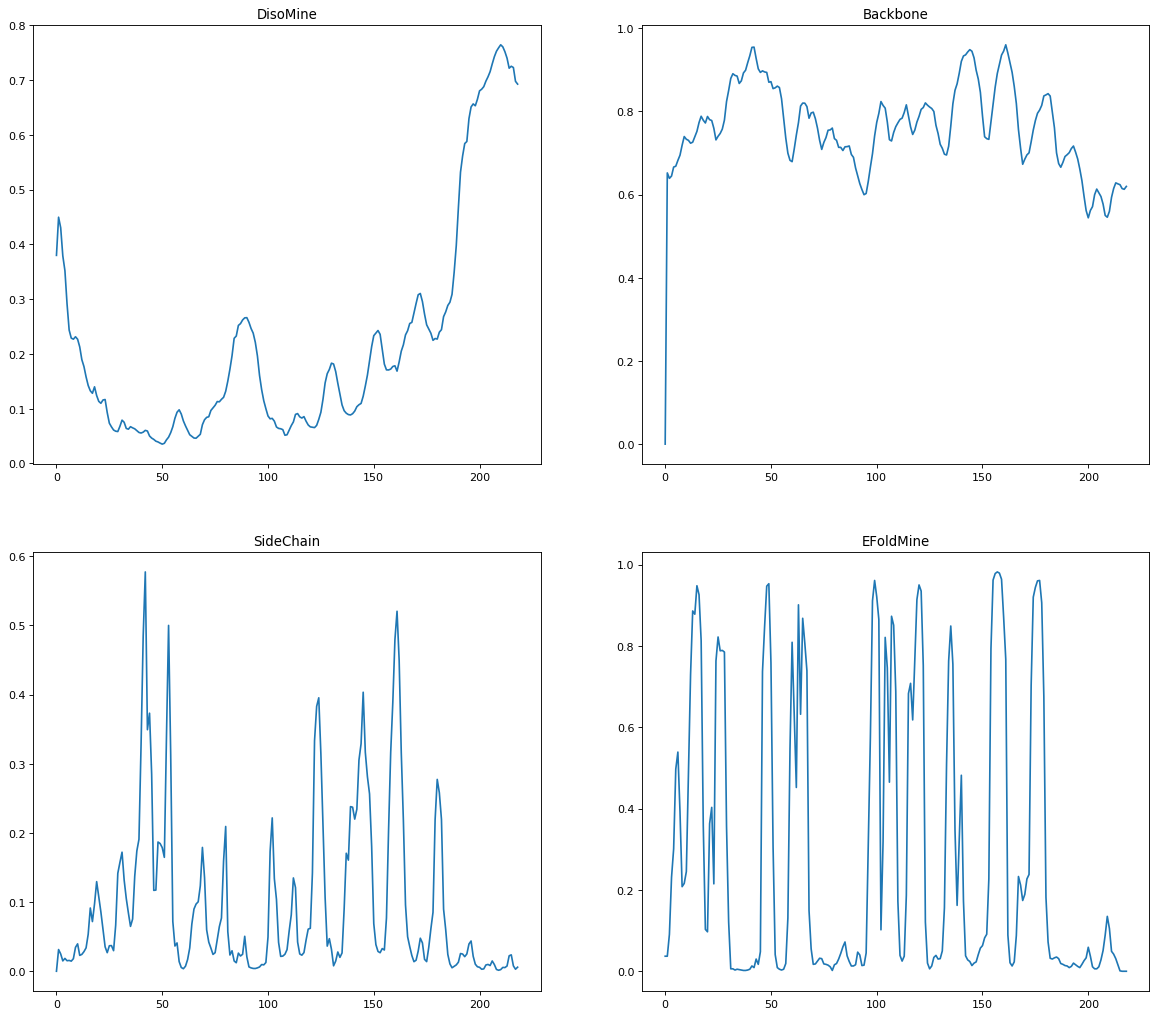

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import json

# Read input Json file
file = open('/Users/Niloofar/Desktop/TrainingSessionAPI/Disomine_backbone_sidechain_efoldmine.json', 'r')
input = file.read()
request_json = json.loads(input)


# residue index
seq = request_json["results"][0]['sequence']

#DisoMine Score
disomine = request_json["results"][0]['disomine']

#backbone Score
backbone = request_json["results"][0]['backbone']

#sidechain Score
sidechain = request_json["results"][0]['sidechain']

#efoldmine Score
efoldmine = request_json["results"][0]['efoldmine']
 
# creating a plot
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

#ploting the DisoMine results
axes = fig.add_subplot(221)
axes.plot(range(len(seq)), disomine)
axes.set_title("DisoMine")

#ploting the Backbone results 
axes = fig.add_subplot(222)
axes.plot(range(len(seq)), backbone)
axes.set_title("Backbone")

#ploting the SideChain results
axes = fig.add_subplot(223)
axes.plot(range(len(seq)), sidechain)
axes.set_title("SideChain")

#ploting the EFoldMine results
axes = fig.add_subplot(224)
axes.plot(range(len(seq)), efoldmine)
axes.set_title("EFoldMine")

plt.show()




## <font color='#B9770E' size = 6><b>DEOGEN2</b></font>


### <font color='2471A3' size = 3.7><b> Getting data from DEOGEN2</b></font>

In [13]:
import json

def getDataFromDEOGEN2(sequence_id, mutation):

    # defining the api-endpoint
    api_endpoint = "https://deogen2.mutaframe.com/fetch_results.php"

    # API key
    key = 1524214674089
    sequence_id = sequence_id
    mutation = mutation
    structure_id = 0

    # data to be sent to api
    data = {
        " ": key,
        "sequence_id": sequence_id,
        "mutation": mutation,
        "structure_id": structure_id,
    }

    # Make POST request with Input body
    response = requests.get(api_endpoint, data)
    queryResults = json.loads(response.text)
    return queryResults

if __name__ == '__main__':
  results = getDataFromDEOGEN2(64689, 'N45S')
  print(results)



{'deogen2': {'prediction': 0.927375, 'features': {'provean': -3.31, 'conservation index': 0.22961454043687, 'probability': 2.0030685628953, 'early folding': -1.593, 'log-odd ratio': 1.7917594692281, 'interaction': 1, 'rvis': -0.271755481, 'gdi': 0.58837, 'recessiveness': 0.77849, 'essentiality': 1, 'pathway': 0}, 'contribution': {'provean': 0.14807462711912, 'conservation index': -0.067067377585845, 'probability': -0.037919316716986, 'early folding': 0.0024153921155141, 'log-odd ratio': 0.25393570735043, 'interaction': 0.0079703881307524, 'rvis': 0.019742243830915, 'gdi': 0.0343571916888, 'recessiveness': 0.10405744136885, 'essentiality': 0.05397585174286, 'pathway': -0.003693229465238}}, 'all_deogen2': {'R372K': '0.393271', 'R372I': '0.436919', 'R372H': '0.433734', 'R372N': '0.441193', 'R372M': '0.442047', 'R372L': '0.442549', 'R372C': '0.440055', 'R372A': '0.442438', 'R372G': '0.444239', 'R372F': '0.444239', 'R372E': '0.440353', 'R372D': '0.442805', 'R372Y': '0.445446', 'R372S': '0.4

### Plotting graph from DEOGEN2 Result 

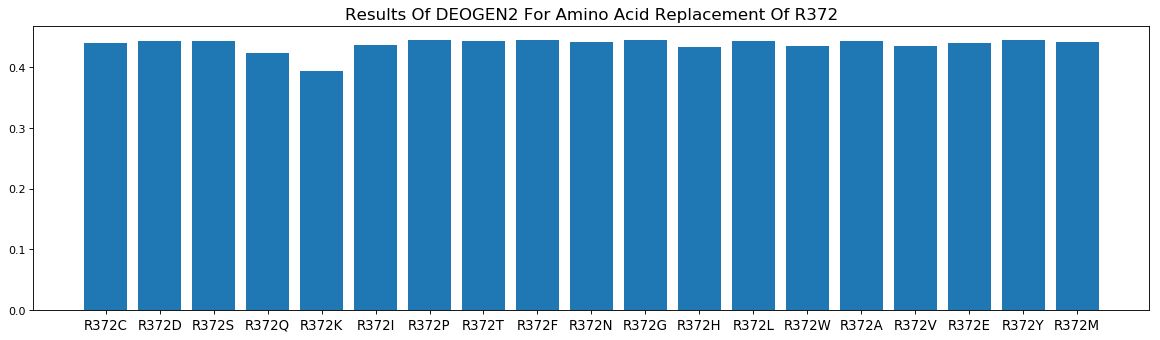

None


In [15]:
import matplotlib.pyplot as plt
import json

def deogen2plot(res):

    # Read input Json file
    file = open('/Users/Niloofar/Desktop/TrainingSessionAPI/DEOGEN2.json', 'r')
    input = file.read()
    request_json = json.loads(input)

    # mutation DEOGEN2 scores

    aa = 'CDSQKIPTFNGHLRWAVEYM'
    prediction = []
    mutations =[]
    for x in aa:
        if x != res[0]:
            df = request_json['all_deogen2'][res+x]
            prediction.append(df)
            mutations.append(res+x)

    deogen2 = [float(i) for i in prediction]

    # creating a plot

    fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

    #ploting the DEOGEN2 results
    
    axes = fig.add_subplot(312)
    axes.bar(mutations, deogen2)
    plt.xticks(mutations, size = 12)
    axes.set_title("Results Of DEOGEN2 For Amino Acid Replacement Of " + res , size = 15)

    plt.show()

if __name__ == '__main__':
  results = deogen2plot('R372')
  print(results)
